___
# Facial Keypoint Detection


Hello, This is a home-project on facial keypoints detection (important points on a human face which can be used for automatic detection of faces using computer vision). So, lets start.

This task has three parts
* Detecting faces and eyes using Haar Cascade
* Building a CNN to detect facial keypoints
* Combining the two tasks to build a face detector

___

# Part 1: Haar Cascade and Pre-processing


___
So, Lets start with the first part.

First we will load a sample image and convert it into grayscale image using OpenCV (grayscale is required for Haar Cascade and Fourier Transform--used below).

In [1]:
import cv2
import matplotlib.pyplot as plt

sample_image_path = 'image/8571.jpg' #one of my professors from Amity University

sample_image = cv2.imread(sample_image_path) 
gray_img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

## STEP 0. Haar Cascade Classifier (For face detection)
___

Before using Haar Cascade, let us understand a brief theory behind it.
Haar Cascade is an ensemble (AdaBoost) of multiple Haar-like Feature Detectors

Haar-Features are used to detect edges and lines with sharp changes in intensity using kernels of all possible sizes and intensities. The algorithm of Haar Classifier requires lots of positive images (images containing faces) faces and negative images (images with no face). Once, the training is complete, Haar Cascade Classifier automatically detects faces in test images. Apart from faces, it can be used to detect eyes, nose, smile, cars, horses (almost any object)!!!

OpenCV provides us with a trained model for faces and eyes which we are going to use in this project. The XML file (haarcascade_frontalface_alt.xml) contains the parameters after training on lots of faces and is pretty accurate. If a user wants, he can train his own classifier (tutorials available).

In [2]:
path = 'image/' # path to  XML file

haar_face_cascade = cv2.CascadeClassifier(path+'haarcascade_frontalface_alt.xml')
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.2, minNeighbors=5)
print('Faces found: ', len(faces))


Faces found:  1


We have found 1 face in the sample image as expected. The resultant numpy array (faces) contains the coordinates for the rectangle around the face. In the above function (for Haar), it is important to understand the parameters

* scaleFactor - The factor by which the size of detection window is decreased after each pass. The higher the scale factor, better the performance. However, higher scaleFactor also means that some faces can go undetected.
* minNeighbors - Min number of neighboring facial features that needs to be detected to be classified as a face. Keeping this parameter low can lead to false positives.

Let us try to print a rectangle around the face.

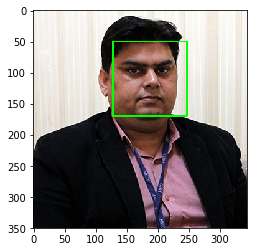

In [3]:
for (x, y, w, h) in faces:
    cv2.rectangle(sample_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)) #OpenCV loads image in BGR format by default but we require RGB format.



## STEP 1. Haar Cascade Classifier (For Eyes)
___

##### Sweet! 
Now lets try to use Haar Cascade Classifier for detection of eyes. OpenCV provides a pretrained-model of Haar Cascade Classifier for eye detection (haarcascade_eye.xml). The steps are similar to face detection except for xml file name.

In [4]:
path = 'image/' # path to  XML file

haar_eye_cascade = cv2.CascadeClassifier(path + 'haarcascade_eye.xml')
eyes = haar_eye_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)
print('Eyes found: ', len(eyes))


Eyes found:  2


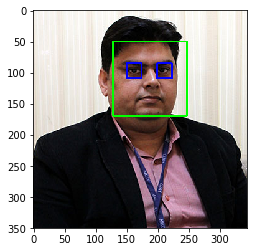

In [5]:
for (x, y, w, h) in eyes:
    cv2.rectangle(sample_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))

Let us put Step 1 and Step 2 in a function and run as a whole and try a random image from net.

In [6]:
def face_and_eyes_haar(image_path,scaleFF,scaleFE,size):
    sample_image = cv2.imread(image_path) 
    gray_img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
    path = 'image/' # path to  XML file
    plt.figure(figsize=(size,size))
    plt.subplot(121),plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    
    
    haar_face_cascade = cv2.CascadeClassifier(path+'haarcascade_frontalface_alt.xml')
    faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=scaleFF, minNeighbors=5)
    print('Faces found: ', len(faces))
    for (x, y, w, h) in faces:
        cv2.rectangle(sample_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
   
    haar_eye_cascade = cv2.CascadeClassifier(path + 'haarcascade_eye.xml')
    eyes = haar_eye_cascade.detectMultiScale(gray_img, scaleFactor=scaleFE, minNeighbors=5)
    print('Eyes found: ', len(eyes))
    for (x, y, w, h) in eyes:
        cv2.rectangle(sample_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
   
    plt.subplot(122),plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
    plt.title('Face and Eye Detection'), plt.xticks([]), plt.yticks([])
    
    plt.show()
    return faces

Faces found:  2
Eyes found:  6


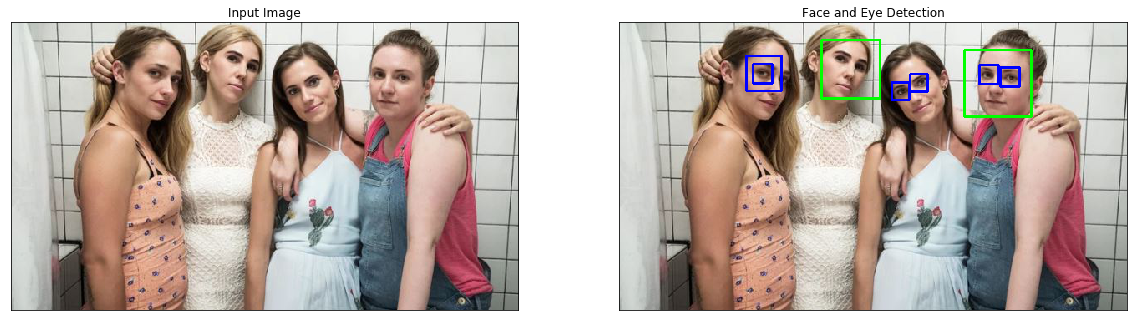

array([[413,  33,  80,  80],
       [242,  21,  70,  70]], dtype=int32)

In [7]:
face_and_eyes_haar('image/group.jpg',1.2,1.2,20)

As you can see, the image results in some false positives. Also some of the faces and the eyes are not detected by the classifier. Let us try using a different scale factor for the same image.

Faces found:  4
Eyes found:  8


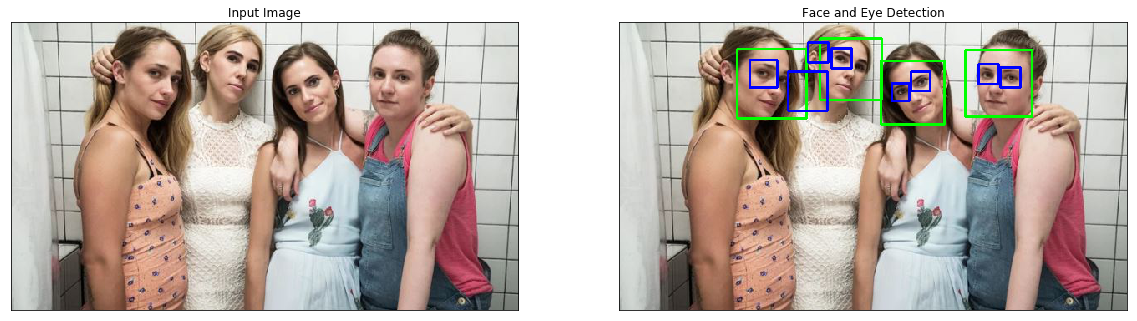

array([[414,  33,  80,  80],
       [240,  19,  74,  74],
       [313,  46,  76,  76],
       [141,  32,  83,  83]], dtype=int32)

In [8]:
face_and_eyes_haar('image/group.jpg',1.015,1.045,20)

As you can see, adjusting the scale factor leads to better face detection. There are however still some false positives for eye detection.

## STEP 2: Dealing with Noisy Images
___

Haar Cascade Classifier may not work so well with noisy images. Since, the classifier relies on Haar features (dependent on sharp changes in intensities to work), noises such as salt and pepper, periodic noise, gaussian noise leads to inaccuracies. Let us take an example of an image with periodic noise. We will use Haar Classifier for detection of face and eyes.

Faces found:  1
Eyes found:  1


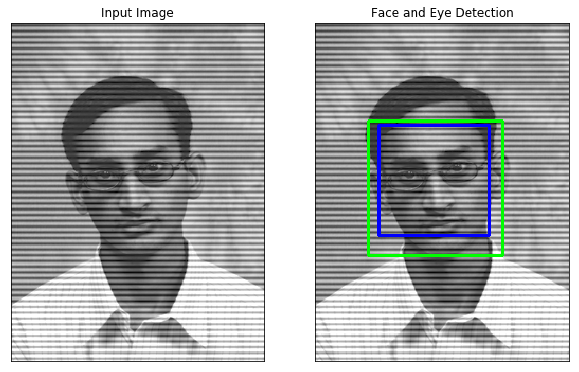

array([[ 50,  93, 127, 127]], dtype=int32)

In [9]:
face_and_eyes_haar('image/noise.png',1.2,1.017,10)

We see that the eye detection does not work properly for the above image. In the above picture, the image has the problem of periodic noise. Let us use Fourier Transform to remove the noise from the image. Fourier Transform is used to represent the image in the frequency domain. Once we obtain the magnitude spectrum of the image, we can remove any sharp and bright spots observed in the image (used for smoothing). Since, the noise is periodic in nature (i.e. it follows a pattern), Fourier Transform will be ideal for denoising the image.

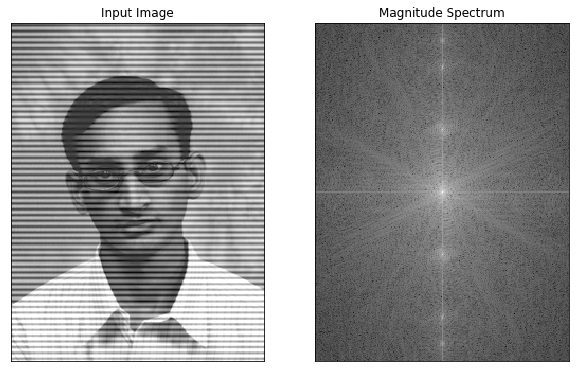

In [10]:
import numpy as np

sample_image = cv2.imread('image/noise.png')
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

#obtain the magnitude spectrum
f = np.fft.fft2(sample_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

#plot the input image
#plot the magnitude spectrum
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(sample_image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Now, let us manually remove the bright spots from the image and then use inverse fourier transform to obtain the resulting image

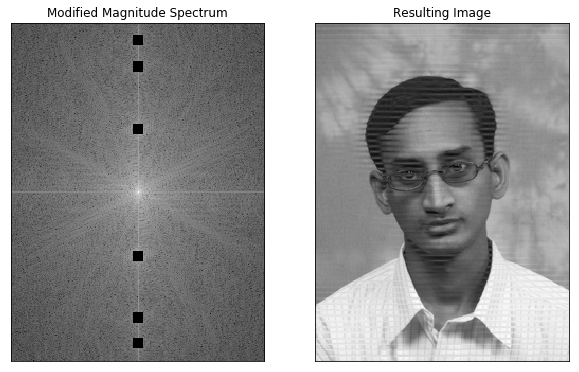

In [11]:
#Again obtaining the spectrum
sample_image = cv2.imread('image/noise.png')
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(sample_image)
pattern = np.fft.fftshift(f)


#Removing bright spots by assigining each pixel (brute-force)
for j in range(115,125):
    for n in range (96,106):
        pattern[n,j] = 1 
        
    for n in range (216,226):
        pattern[n,j] = 1
    
    for n in range (274,284):
        pattern[n,j] = 1
    
    for n in range (298,308):
        pattern[n,j] = 1
    
    for n in range (12,22):
        pattern[n,j] = 1
    
    for n in range (37,47):
        pattern[n,j] = 1 
        
m_magnitude_spectrum = 20*np.log(np.abs(pattern))

#inverse fourier transform
ptnfx = np.abs(np.fft.ifft2(np.fft.ifftshift(pattern)));

#plotting modified spectrum and resulting image
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(m_magnitude_spectrum, cmap = 'gray')
plt.title('Modified Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ptnfx, cmap = 'gray')
plt.title('Resulting Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.ioff()
plt.clf()
plt.imshow(ptnfx, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.savefig('image/removed_noise.png',bbox_inches='tight',pad_inches=-0.1)
plt.close()


We have removed most of the noise from the image. Now let us use Haar Cascade Classifer on the resulting image using the same scaleFactor.

Faces found:  1
Eyes found:  2


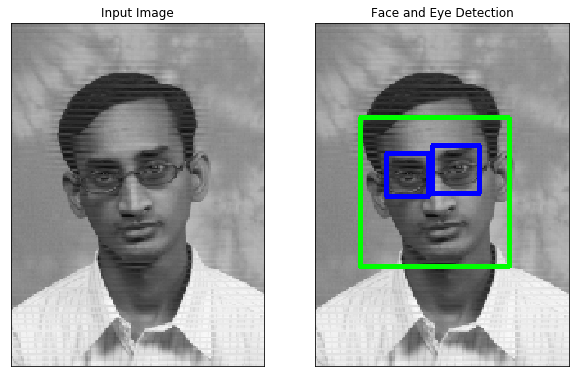

array([[27, 58, 91, 91]], dtype=int32)

In [12]:
face_and_eyes_haar('image/removed_noise.png',1.2,1.017,10)

As we can see, the classifier now detects both the eyes as well as the face clearly. Hence, removing noise helped in increasing the chances for better detection.

## STEP 3. Image Blurring and Edge Detection

***
Most edge detection algorithms are sensitive to noise. This is because edge detection algorithm are largely based on sharpness and 'abrupt intensity change' at the edges. However, such phenomena can be observed in the whole image, if there is too much noise. Gaussian Blur Filter helps in removing the level of noise in the image by blurring the image. Consequently, the result of edge-detection algorithm is improved.


In [13]:
def canny_edge_det(image_path,kernel_size=0,sigma=0):
    image = cv2.imread(image_path) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      
    title = ''
    
    #gaussian blur image
    if kernel_size is not 0 or sigma is not 0:
        image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
        title = 'Blurred Image kernel size = ' + str(kernel_size) + ' sigma = ' + str(sigma)
    else:
        title = 'Original Image without blur'

    #apply canny edge filter and dilate to observe edges
    edges = cv2.Canny(image,100,200)
    edges = cv2.dilate(edges, None)

    #plot input image
    plt.figure(figsize = (15,15))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(title)

    #plot edges
    plt.subplot(122)
    plt.imshow(edges, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title('Edge Detection')
    plt.show()

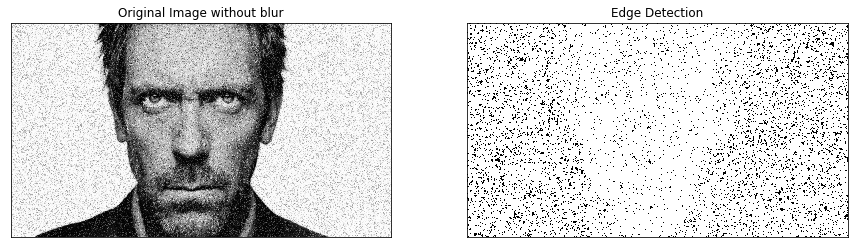

In [14]:
canny_edge_det('image/house.jpg')

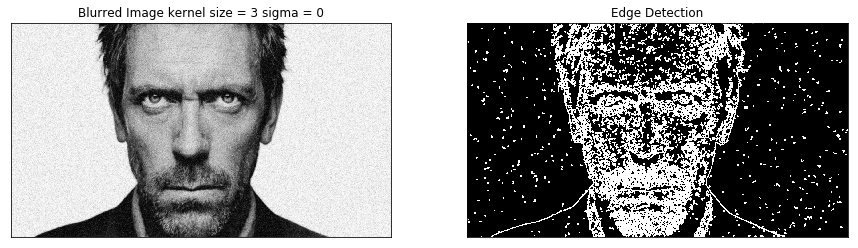

In [15]:
canny_edge_det('image/house.jpg',3,0)

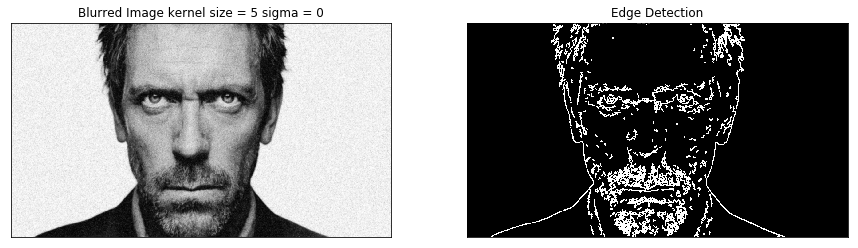

In [16]:
canny_edge_det('image/house.jpg',5,0)

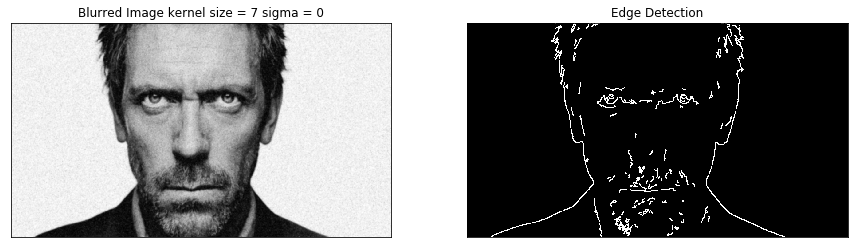

In [17]:
canny_edge_det('image/house.jpg',7,0)

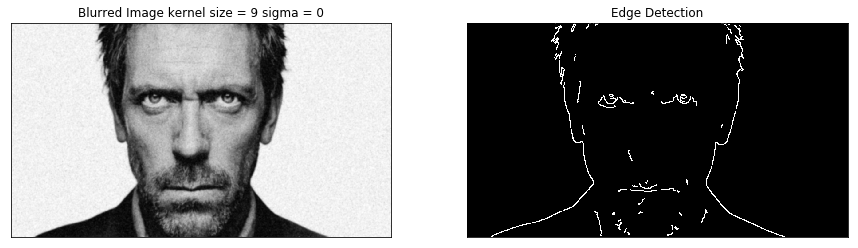

In [18]:
canny_edge_det('image/house.jpg',9,0)

With increase in blur intensity, the edge detection algorithm perform better. Blurring helps because it removes the local structures, and only the boundary information prevails. However, if we blur the image more than necessary, we risk losing the features important for edge detection.

## STEP 4: Hiding the identity of an individual
***
We often come across situations where we need to hide the identity of a person in a photo or video. For example, news channels are often required to hide the identity of the accused or the victim by blurring their faces. However, blurring the face in a video manually with thousands of frames is a huge task. In such situations, it becomes necessary to apply an automatic method of blurring/hiding detected faces. 
For us, the task is easy because we are already detecting faces using Haar Cascade Classifier. All we need to do is replace the detected faces with blurred portion (using Gaussian Blur with high kernel size).

Faces found:  1
Eyes found:  3


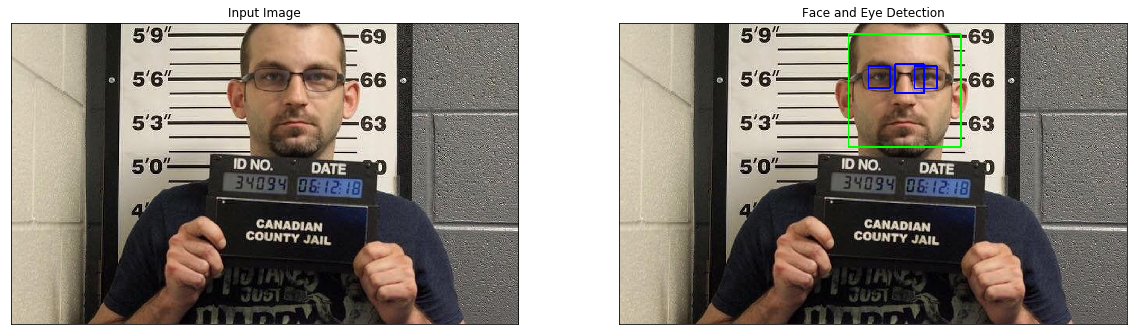

In [19]:
faces = face_and_eyes_haar('image/accused.jpg',1.2,1.2,20)

Shown above is a sample image. We will now use Gaussian Blur on the detected part.

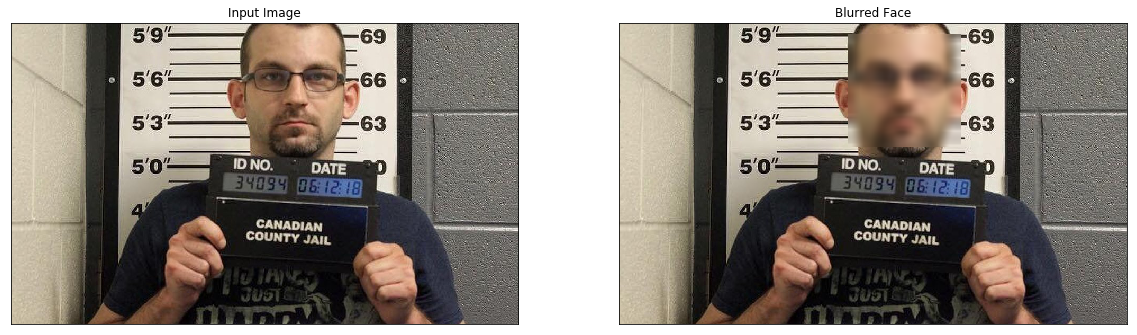

In [20]:
#Blur each image using Gaussian Blur
for (x,y,w,h) in faces:
    samp_image = cv2.imread('image/accused.jpg')
    blur_image = cv2.imread('image/accused.jpg')
    crp = samp_image[y:y+h, x:x+w]
    crp = cv2.GaussianBlur(crp, (25, 25), 10)
    blur_image[y:y+h,x:x+w] = crp
    
#Plot figure 1: Input
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(cv2.cvtColor(samp_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

#Plot figure 2:Blurred
plt.subplot(122),plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Face'), plt.xticks([]), plt.yticks([])
plt.show()


***

# PART 2: Facial Keypoint Detection Using CNN

***

Facial keypoints are used to mark important areas of the face - the eyes, corners of the mouth, the nose etc. We will start by creating and training a CNN that can detect facial keypoints in a small dataset of cropped images of human faces. 

The problem of Facial Keypoints is a regression problem (a set of 15 facial keypoints as [x,y] coordinates). Hence, our CNN will have 30 output nodes in the end (separate nodes for x and y coordinate).

In order to train a regressor, we need a dataset with facial image/facial keypoint pairs. We will use the Kaggle Dataset available for facial keypoints. There are two csv files available. 

* Training.csv - First CSV file contains information for 2140 training images. The first 30 rows contain the keypoint location of the faces and the last row contains the pixel information for facial images. 
* Testing.csv - First CSV file contains information for  1783 testing images. The file contains the pixels information of images (row-orderd)

We will start with normalization of the CSV files.

In [64]:
import pandas as pd
from sklearn.utils import shuffle

training_data = pd.read_csv('data/training.csv')
training_data = shuffle(training_data)
training_data = training_data.dropna()
print("Shape of training data (30 coordinates and 1 image pixel info)" + str(training_data.shape))

testing_data = pd.read_csv('data/test.csv')
print("Shape of testing data (1 image id and 1 image pixel info)" + str(testing_data.shape))

Shape of training data (30 coordinates and 1 image pixel info)(2140, 31)
Shape of testing data (1 image id and 1 image pixel info)(1783, 2)


In [65]:
size_of_image = 96

training_input_Y = training_data.iloc[:,0:30]
training_input_X_temp = training_data.iloc[:,30] #need to split column
testing_input_X_temp = testing_data.iloc[:,1] #need to split column

training_input_Y = training_input_Y.divide(size_of_image) #all values normalized from 0 to 1

training_faces=[]
for face in training_input_X_temp:
    pixels = face.split(' ') #splitting pixels values
    pixels = list(map(float,pixels)) #mapping to float 
    pixels = [float(x/255) for x in pixels] #normalizing from 0 to 1
    training_faces.append(pixels) # append to list
    
training_input_X = pd.DataFrame(training_faces) #convert back to dataframe
print("Shape of training data input = " + str(training_input_X.shape))
print("Shape of training data output = " + str(training_input_Y.shape))


testing_faces=[]
for face in testing_input_X_temp:
    pixels = face.split(' ') #splitting pixels values
    pixels = list(map(float,pixels)) #mapping to float 
    pixels = [float(x/255) for x in pixels] #normalizing from 0 to 1
    testing_faces.append(pixels) # append to list
    
testing_input_X = pd.DataFrame(testing_faces) #convert back to dataframe
print("Shape of testing data input = " + str(testing_input_X.shape))

Shape of training data input = (2140, 9216)
Shape of training data output = (2140, 30)
Shape of testing data input = (1783, 9216)


## STEP 5: Visualizing the dataset and Defining a CNN Model
***
We have created Pandas dataframe (with normalized values) for training and testing. Now, we will define a function which takes the pixel information (from training_input_X) and facial keypoints (from training_input_Y) and plot it to visualize what we need to achieve.


In [66]:
def visualize(pixels,keypoints):
    fig, ax = plt.subplots()
    pixels = np.asarray(pixels)
    pixels = pixels.reshape(size_of_image,size_of_image)
    ax.imshow(pixels*255,cmap='gray')
    
    keypoints = list(keypoints)
    for i in range(0,len(keypoints)-1,2):
        ax.plot([keypoints[i] * size_of_image],[keypoints[i+1] * size_of_image], marker='o', markersize=3, c = 'red')

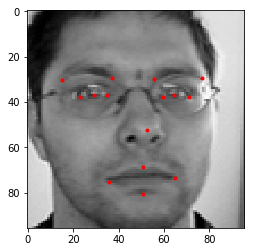

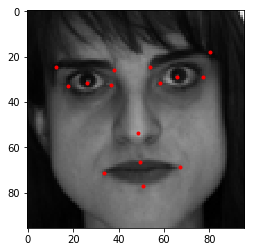

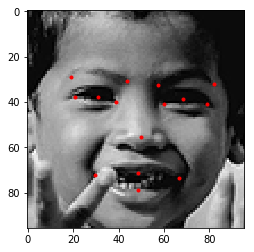

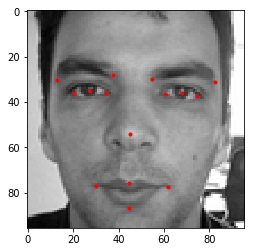

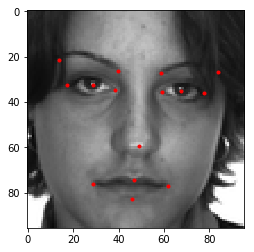

In [67]:
for j in range(5):
    visualize(training_input_X.iloc[j],training_input_Y.iloc[j])

## Model 

In [89]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense


model = Sequential()
model.add(Convolution2D(8, (3, 3), activation='relu', input_shape=(size_of_image,size_of_image,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500))
#model.add(Dropout(0.2))

model.add(Dense(30))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 94, 94, 8)         80        
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 47, 47, 8)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 46, 46, 16)        528       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 22, 22, 32)        2080      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 3872)              0         
__________

## STEP 6: Compile and Train the Model
___

## Using Adagrad Optimizer: Model 1
***

In [86]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adam

train_frames_X = np.empty((len(training_input_X),size_of_image,size_of_image,1))
for i in range(len(training_input_X)):
    train_frames_X[i,:,:,0] = np.asarray(training_input_X.iloc[i]).reshape(size_of_image,size_of_image) 

## TODO: Compile the model
model.compile(optimizer='Adagrad', loss='mean_squared_error', metrics=['accuracy'])

epochs = 30
## TODO: Train the model
history1 = model.fit(train_frames_X, training_input_Y, 
          validation_split=0.25,
          epochs=epochs, batch_size=30, verbose=1)

## TODO: Save the model as model.h5
model.save('model1.h5')


Train on 1605 samples, validate on 535 samples
Epoch 1/30
1605/1605 [==============================] - 12s 8ms/step - loss: 0.1079 - acc: 0.4766 - val_loss: 0.0022 - val_acc: 0.5813
Epoch 2/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0020 - acc: 0.6349 - val_loss: 0.0016 - val_acc: 0.6972
Epoch 3/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0016 - acc: 0.6910 - val_loss: 0.0015 - val_acc: 0.7140
Epoch 4/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0014 - acc: 0.7034 - val_loss: 0.0014 - val_acc: 0.7159
Epoch 5/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0013 - acc: 0.6966 - val_loss: 0.0012 - val_acc: 0.7121
Epoch 6/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0011 - acc: 0.7047 - val_loss: 0.0012 - val_acc: 0.7121
Epoch 7/30
1605/1605 [==============================] - 10s 7ms/step - loss: 0.0010 - acc: 0.6991 - val_loss: 8.7287e-04 - val_acc: 0.7103
Epoc

## Using SGD Optimizer: Model 2
***

In [84]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

train_frames_X = np.empty((len(training_input_X),size_of_image,size_of_image,1))
for i in range(len(training_input_X)):
    train_frames_X[i,:,:,0] = np.asarray(training_input_X.iloc[i]).reshape(size_of_image,size_of_image) 

## TODO: Compile the model
model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['accuracy'])

epochs = 30
## TODO: Train the model
history2 = model.fit(train_frames_X, training_input_Y, 
          validation_split=0.25,
          epochs=epochs, batch_size=30, verbose=1)

## TODO: Save the model as model.h5
model.save('model2.h5')

Train on 1605 samples, validate on 535 samples
Epoch 1/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0531 - acc: 0.2069 - val_loss: 0.0140 - val_acc: 0.3607
Epoch 2/30
1605/1605 [==============================] - 10s 6ms/step - loss: 0.0134 - acc: 0.3464 - val_loss: 0.0124 - val_acc: 0.3776
Epoch 3/30
1605/1605 [==============================] - 12s 7ms/step - loss: 0.0119 - acc: 0.3695 - val_loss: 0.0114 - val_acc: 0.4056
Epoch 4/30
1605/1605 [==============================] - 12s 7ms/step - loss: 0.0107 - acc: 0.3950 - val_loss: 0.0100 - val_acc: 0.4318
Epoch 5/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0097 - acc: 0.4243 - val_loss: 0.0091 - val_acc: 0.4374
Epoch 6/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0088 - acc: 0.4355 - val_loss: 0.0084 - val_acc: 0.4692
Epoch 7/30
1605/1605 [==============================] - 10s 6ms/step - loss: 0.0081 - acc: 0.4604 - val_loss: 0.0076 - val_acc: 0.4841
Epoch 8/

## Using RMSProp Optimizer: Model 3
___

In [88]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

train_frames_X = np.empty((len(training_input_X),size_of_image,size_of_image,1))
for i in range(len(training_input_X)):
    train_frames_X[i,:,:,0] = np.asarray(training_input_X.iloc[i]).reshape(size_of_image,size_of_image) 

## TODO: Compile the model
model.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['accuracy'])

epochs = 30
## TODO: Train the model
history3 = model.fit(train_frames_X, training_input_Y, 
          validation_split=0.25,
          epochs=epochs, batch_size=30, verbose=1)

## TODO: Save the model as model.h5
model.save('model3.h5')

Train on 1605 samples, validate on 535 samples
Epoch 1/30
1605/1605 [==============================] - 12s 8ms/step - loss: 0.2016 - acc: 0.2542 - val_loss: 0.0153 - val_acc: 0.6019
Epoch 2/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0163 - acc: 0.4685 - val_loss: 0.0071 - val_acc: 0.2374
Epoch 3/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0082 - acc: 0.5670 - val_loss: 0.0032 - val_acc: 0.7159
Epoch 4/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0055 - acc: 0.5757 - val_loss: 0.0015 - val_acc: 0.7121
Epoch 5/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0049 - acc: 0.5726 - val_loss: 0.0028 - val_acc: 0.7065
Epoch 6/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0045 - acc: 0.6131 - val_loss: 0.0017 - val_acc: 0.7308
Epoch 7/30
1605/1605 [==============================] - 11s 7ms/step - loss: 0.0031 - acc: 0.6237 - val_loss: 0.0031 - val_acc: 0.6972
Epoch 8/

## Using Adam Optimizer: Model 4
___

In [90]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adam

train_frames_X = np.empty((len(training_input_X),size_of_image,size_of_image,1))
for i in range(len(training_input_X)):
    train_frames_X[i,:,:,0] = np.asarray(training_input_X.iloc[i]).reshape(size_of_image,size_of_image) 

## TODO: Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

epochs = 30
## TODO: Train the model
history4 = model.fit(train_frames_X, training_input_Y, 
          validation_split=0.25,
          epochs=epochs, batch_size=30, verbose=1)

## TODO: Save the model as model.h5
model.save('model4_adam.h5')


Train on 1605 samples, validate on 535 samples
Epoch 1/30
1605/1605 [==============================] - 14s 9ms/step - loss: 0.0226 - acc: 0.4231 - val_loss: 0.0026 - val_acc: 0.7140
Epoch 2/30
1605/1605 [==============================] - 12s 8ms/step - loss: 0.0016 - acc: 0.6717 - val_loss: 0.0011 - val_acc: 0.7252
Epoch 3/30
1605/1605 [==============================] - 12s 8ms/step - loss: 9.4350e-04 - acc: 0.7053 - val_loss: 8.2530e-04 - val_acc: 0.7178
Epoch 4/30
1605/1605 [==============================] - 12s 8ms/step - loss: 6.7060e-04 - acc: 0.7271 - val_loss: 7.1493e-04 - val_acc: 0.7402
Epoch 5/30
1605/1605 [==============================] - 12s 7ms/step - loss: 5.9328e-04 - acc: 0.7383 - val_loss: 7.3574e-04 - val_acc: 0.7458
Epoch 6/30
1605/1605 [==============================] - 12s 7ms/step - loss: 5.3873e-04 - acc: 0.7520 - val_loss: 6.7476e-04 - val_acc: 0.6935
Epoch 7/30
1605/1605 [==============================] - 12s 7ms/step - loss: 4.9559e-04 - acc: 0.7558 - val_los

## STEP 7: Visualizing Loss/Accuracy and Test Results
___

## Visualizing Loss and Accuracy for Different Optimizers
___

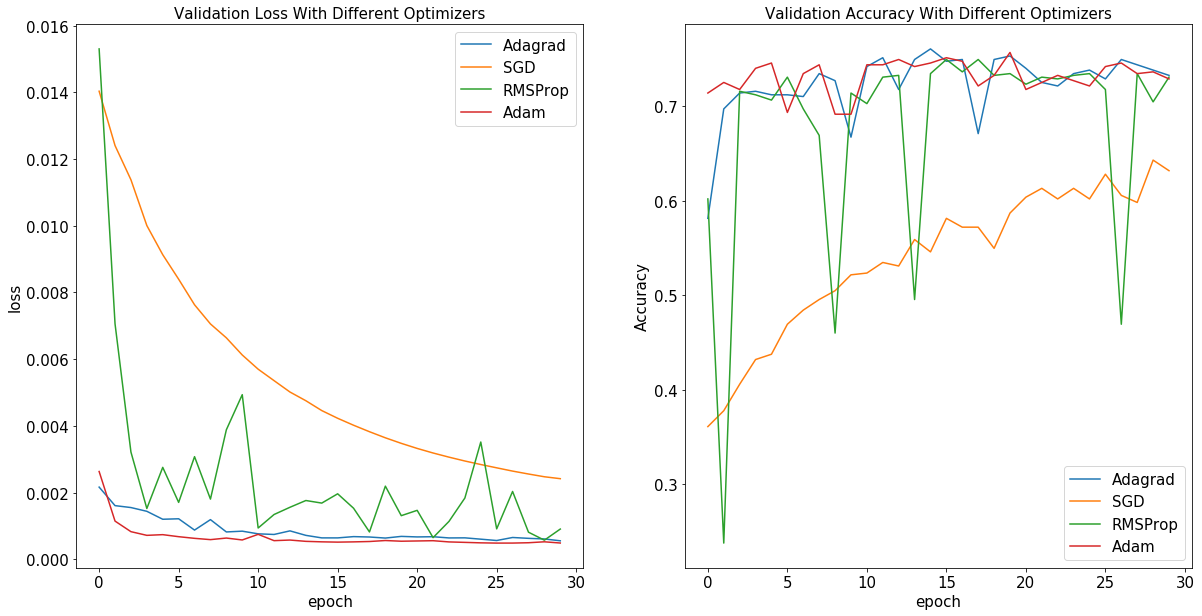

In [123]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

plt.figure(figsize = (20,10))
plt.subplot(121)
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.title('Validation Loss With Different Optimizers', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['Adagrad', 'SGD','RMSProp','Adam'], loc='best',fontsize=15)

plt.subplot(122)
plt.plot(history1.history['val_acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history4.history['val_acc'])
plt.title('Validation Accuracy With Different Optimizers', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['Adagrad', 'SGD','RMSProp','Adam'], loc='best',fontsize=15)
plt.show()

## Training and Validation Statistics for Adam Optimizer
___

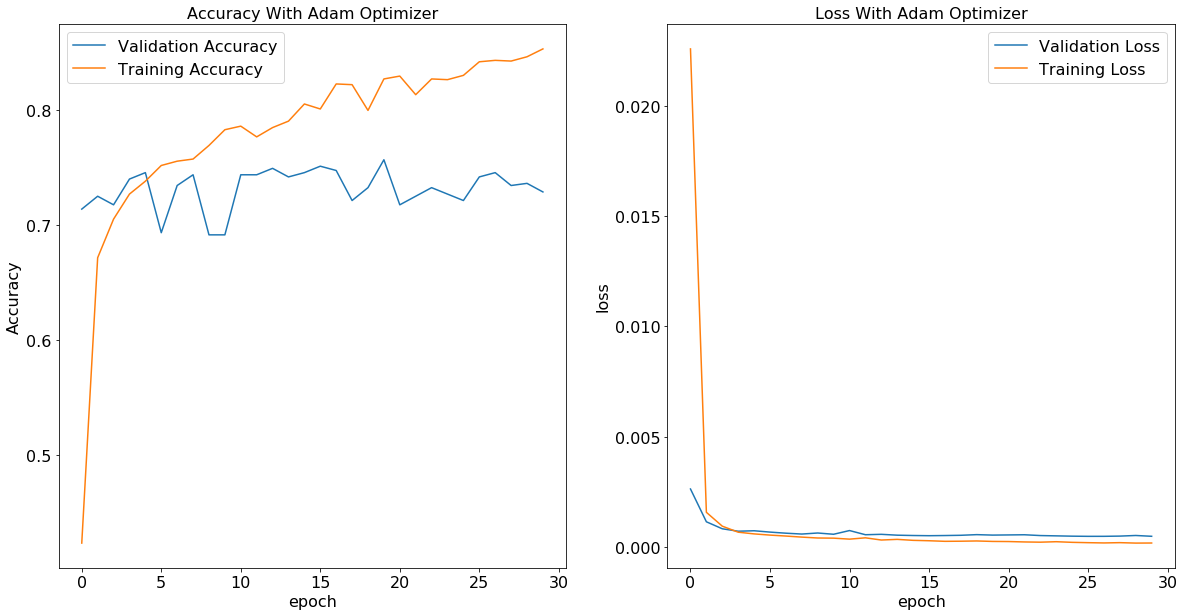

In [117]:
import matplotlib
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

plt.figure(figsize = (20,10))

plt.subplot(121)
plt.plot(history4.history['val_acc'])
plt.plot(history4.history['acc'])
plt.title('Accuracy With Adam Optimizer', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.legend(['Validation Accuracy', 'Training Accuracy'], loc='best',fontsize=16)

plt.subplot(122)
plt.plot(history4.history['val_loss'])
plt.plot(history4.history['loss'])
plt.title('Loss With Adam Optimizer', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.legend(['Validation Loss', 'Training Loss'], loc='best',fontsize=16)

plt.show()


## Visualizing Test Results
___

In [131]:
from keras.models import load_model

def test(data):
    test_frame = np.empty((1,size_of_image,size_of_image,1))
    model = load_model('model4_adam.h5')
    test_frame[0,:,:,0] = np.asarray(data).reshape(size_of_image,size_of_image) 
    return model.predict(test_frame)

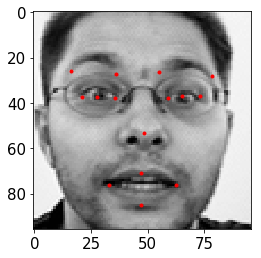

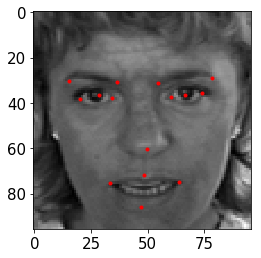

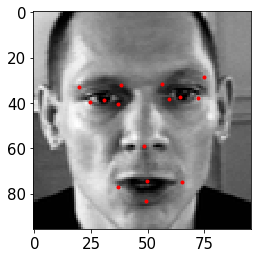

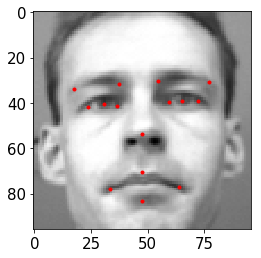

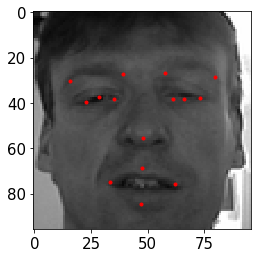

In [135]:
for j in range(5):
    keypoints = test(testing_input_X.iloc[j])[0]
    visualize(testing_input_X.iloc[j],keypoints)

___
# PART 3: Combining Part 1 and Part 2 to build a face detector
___

In [213]:
def combine(image_path,scale_face,scale_eye):
    
    faces = face_and_eyes_haar(image_path,scale_face,scale_eye,20)
    plt.figure(figsize=(30,15))
    img_c = cv2.imread(image_path)
    for (x,y,w,h) in faces:
        img = cv2.imread(image_path)
        x_scale_factor = float(w/size_of_image)
        y_scale_factor = float(h/size_of_image)
        
        crop_img = img[y:y+h, x:x+w]
        crop_img = cv2.resize(crop_img,(size_of_image,size_of_image), interpolation=cv2.INTER_CUBIC)
        crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
        crop_img = crop_img/255
        keypoints = test(crop_img)[0]
        #visualize(crop_img,keypoints)
        
        cv2.rectangle(img_c, (x, y), (x+w, y+h), (0, 255, 0), 2)
        plt.subplot(121)
        plt.title('Keypoints'), plt.xticks([]), plt.yticks([]) 
        for i in range(0,len(keypoints)-1,2):
            plt.plot([keypoints[i] * size_of_image * x_scale_factor + x],[keypoints[i+1] * size_of_image * y_scale_factor + y], marker='o', markersize=2, c = 'red')
   
    plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))
    plt.show()

Faces found:  2
Eyes found:  3


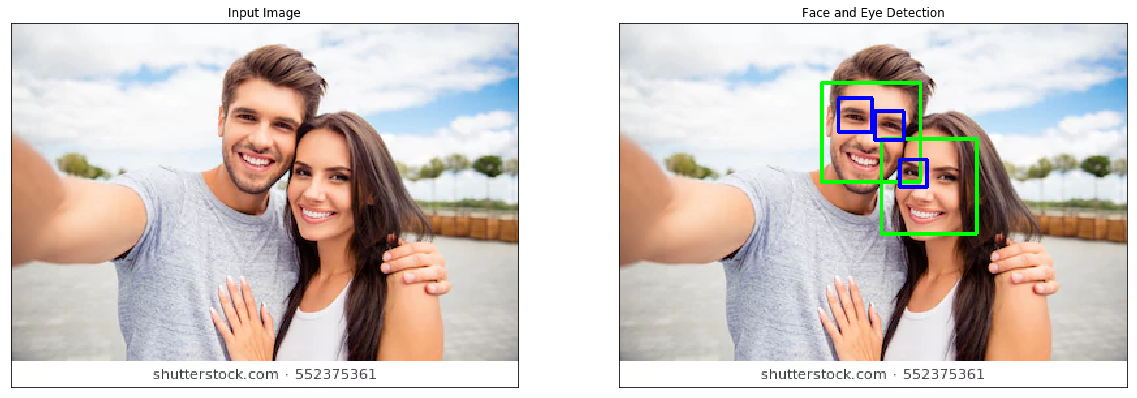

c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


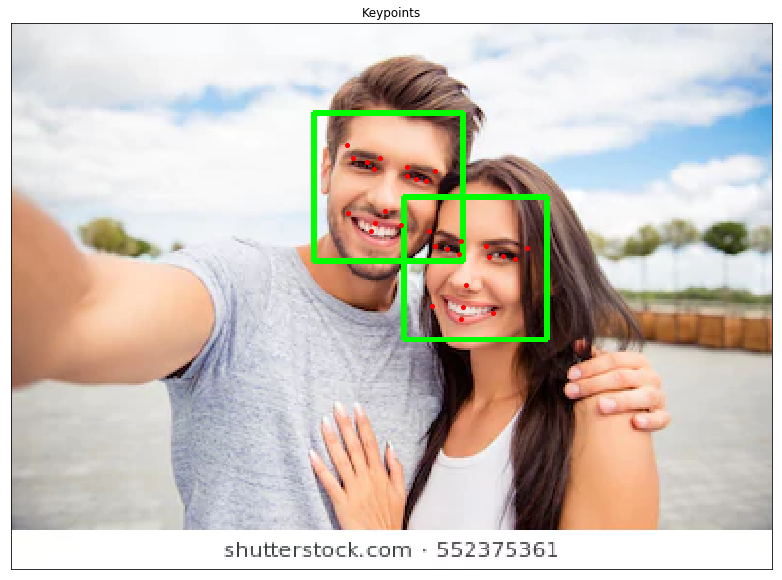

In [209]:
combine('image/couple.jpg',1.1,1.1)

Faces found:  5
Eyes found:  8


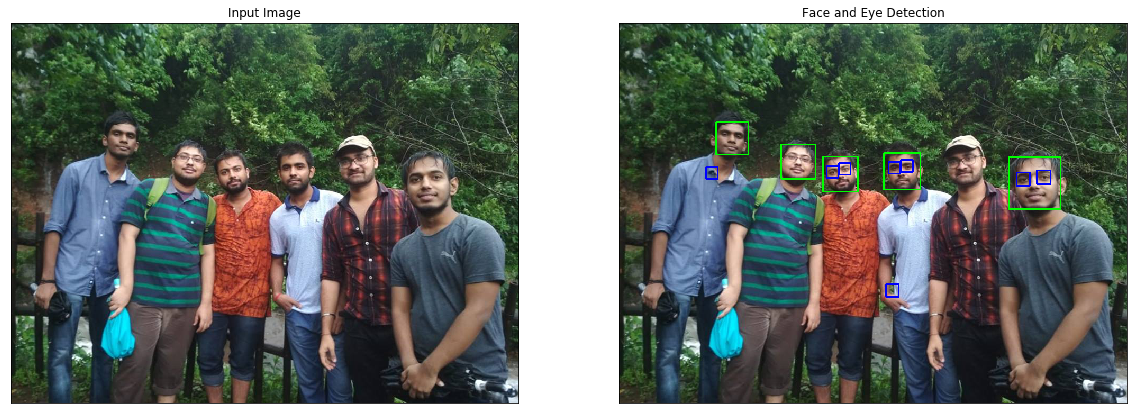

c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


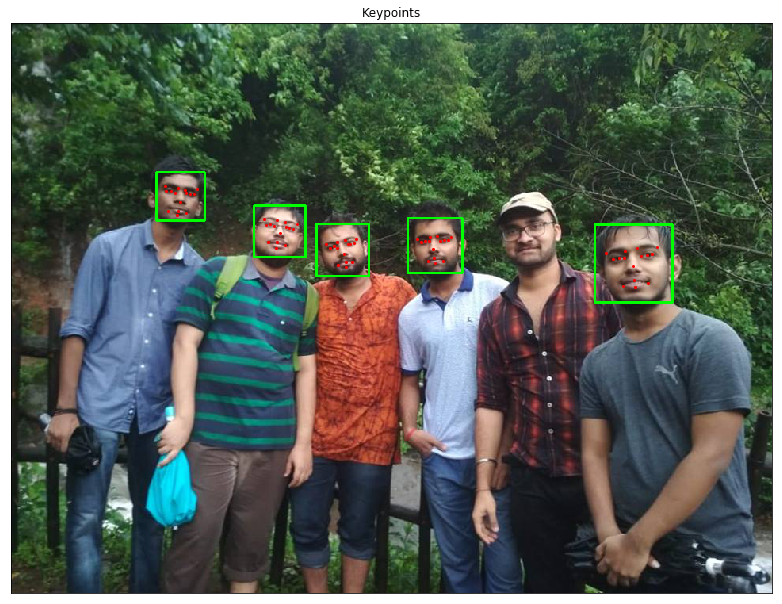

In [219]:
combine('image/facebook.jpg',1.2,1.07)